<a href="https://colab.research.google.com/github/sds-capstone/2022-09-proj7-women-at-table/blob/demographics-and-fin48/CapstoneDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# imports 
import pandas as pd
# import pipe
import numpy as np
import seaborn as sns
from plotnine import *

In [ ]:
file = '/content/findex_SubSahAfrica.csv'
df = pd.read_csv(file, index_col=0)
print(f'There are {df.shape[0]} entries and {df.shape[1]} features')
df.head()

In [ ]:
#@title recoding values + variables

# demographic variables

dem_df = df[['educ', 'age', 'fin48', 'female', 'fin24']]

# recode fin48
dem_df.loc[dem_df['fin48'] == 1, "fin48"] = 'Yes'
dem_df.loc[dem_df['fin48'] == 2, "fin48"] = 'No'
dem_df.loc[dem_df['fin48'] == 3, "fin48"] = 'Don\'t Know'
dem_df.loc[dem_df['fin48'] == 4, "fin48"] = 'Refuse'

# recode fin24
dem_df.loc[dem_df['fin24'] == 1, "fin24"] = 'Yes'
dem_df.loc[dem_df['fin24'] == 2, "fin24"] = 'No'
dem_df.loc[dem_df['fin24'] == 3, "fin24"] = 'Don\'t Know'
dem_df.loc[dem_df['fin24'] == 4, "fin24"] = 'Refuse'


# recode educ values

dem_df.loc[dem_df['educ'] == 1, "educ"] = 'Primary'
dem_df.loc[dem_df['educ'] == 2, "educ"] = 'Secondary'
dem_df.loc[dem_df['educ'] == 3, "educ"] = 'Tertiary'
dem_df.loc[dem_df['educ'] == 4, "educ"] = 'Don\'t Know'
dem_df.loc[dem_df['educ'] == 5, "educ"] = 'Refuse'

# recode female values 

dem_df.loc[dem_df['female'] == 1, "female"] = 'Male'
dem_df.loc[dem_df['female'] == 2, "female"] = 'Female'

# rename variables 

dem_df.rename(columns = {'fin48': 'national_id', 'educ': 'education', 'female': 'gender', 'fin24': 'has_access'}, inplace = True)
dem_df.head()


In [ ]:
#@title Plots I want to Make

## all plots need to be pretty, simple, readable, and make sure they have good labels
### - rename the labels

# edcuation levels split by gender

# education + national ID 

# education + has_access

# national_id + has_access  

# age + has_access

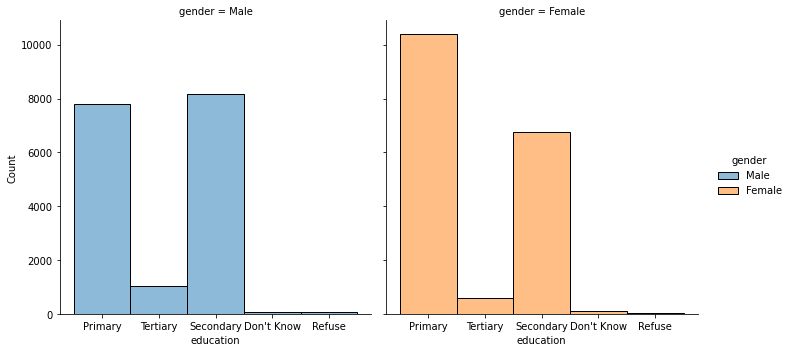

In [ ]:
#@title Education by Gender
sns.displot(x="education", col= "gender", hue= "gender", data=dem_df)

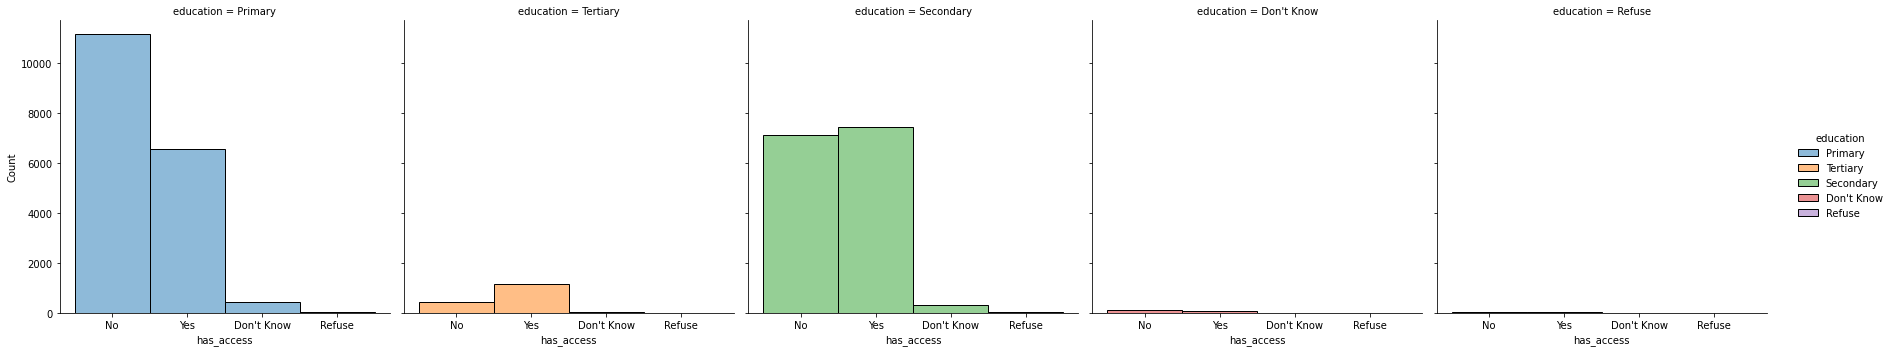

In [ ]:
#@title Edcuation & Access

sns.displot(x="has_access", hue= "education", col= "education", data=dem_df)

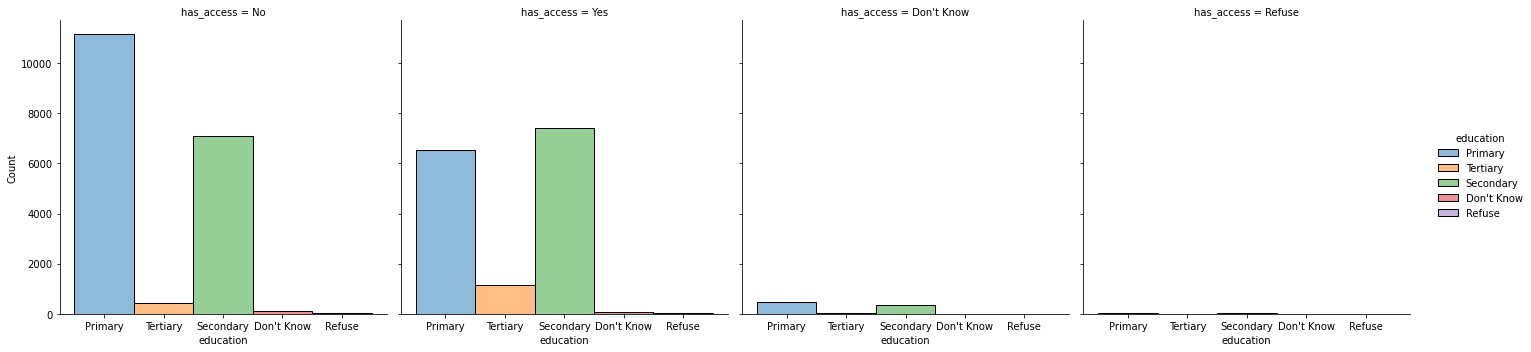

In [ ]:
#@title Edcuation & Access - flipped

sns.displot(x="education", hue= "education", col= "has_access", data=dem_df)

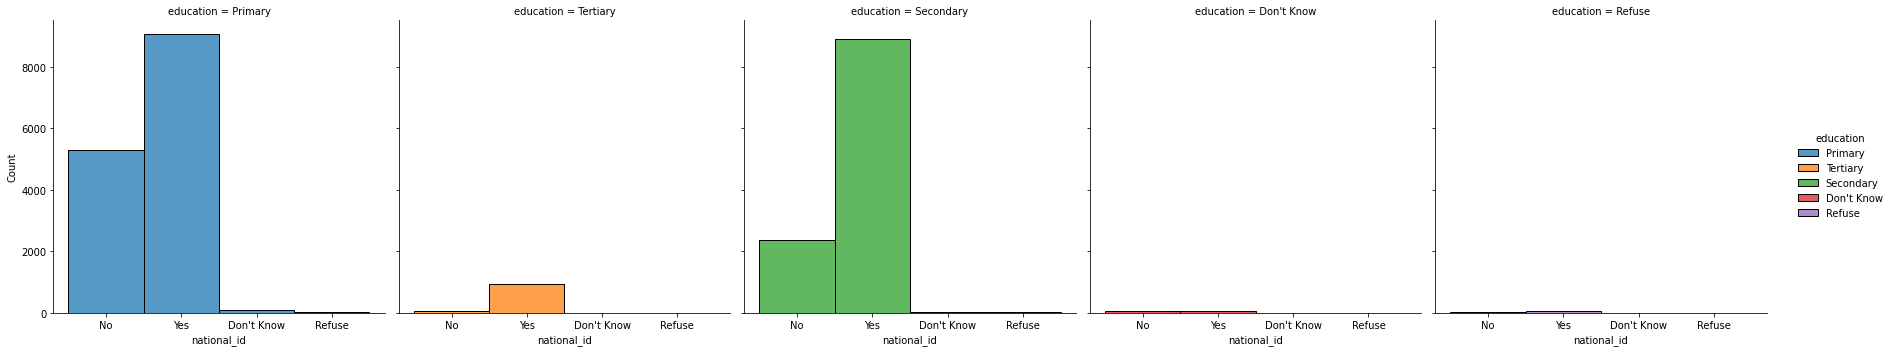

In [ ]:
#@title Education Compared to NationalID

sns.displot(x= "national_id", hue= "education", multiple="stack", col= "education", data=dem_df)

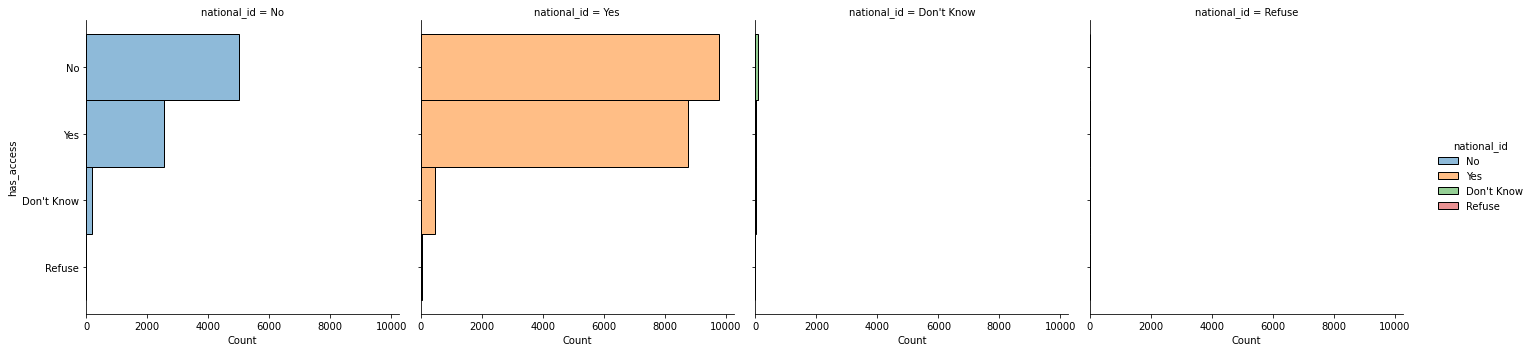

In [ ]:
#@title National_ID & Access

sns.displot(y="has_access", hue= "national_id", col= "national_id", data=dem_df)

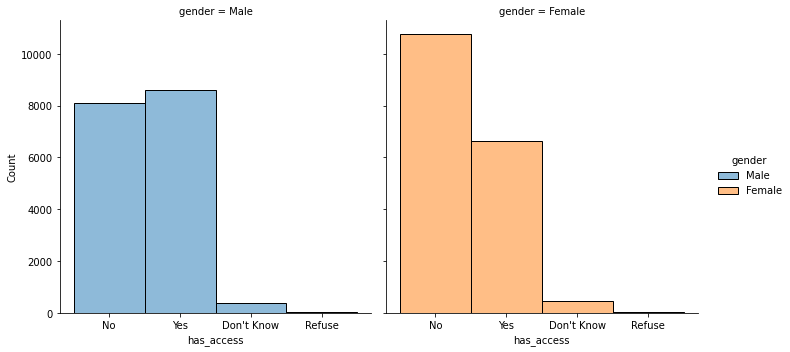

In [ ]:
#@title Gender & Access

sns.displot(x="has_access", col= "gender", hue= "gender", data=dem_df)

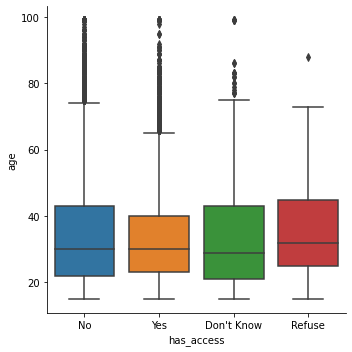

In [ ]:
#@title Age & Access

sns.catplot(x="has_access", y= "age", data=dem_df, kind="box")

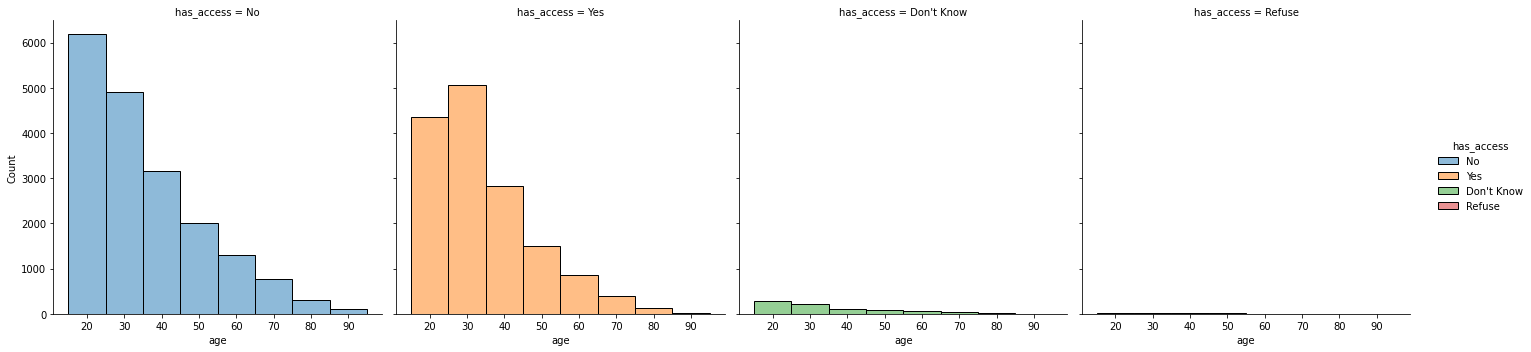

In [ ]:
#@title Age & Access option 2

sns.displot(x= "age", col= "has_access", hue="has_access", bins = [15,25,35,45,55,65,75,85,95], data=dem_df)